<img src="http://akhavanpour.ir/notebook/images/srttu.gif" alt="SRTTU" style="width: 150px;"/>

[![Azure Notebooks](https://notebooks.azure.com/launch.png)](https://notebooks.azure.com/import/gh/Alireza-Akhavan/class.vision)

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">معرفی مجموعه داده هدی و تغییر اندازه و شکل برای استفاده در الگوریتم‌های یادگیری ماشین
</div>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">معرفی مجموعه داده ارقام دستنویس هدی</div>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
مجموعه ارقام دستنویس هدی که اولین مجموعه‌ی بزرگ ارقام دستنویس فارسی است، مشتمل بر ۱۰۲۳۵۳ نمونه دستنوشته سیاه سفید است. این مجموعه طی انجام یک پروژه‏ی کارشناسی ارشد درباره بازشناسی فرمهای دستنویس تهیه شده است. داده های این مجموعه از حدود ۱۲۰۰۰ فرم ثبت نام آزمون سراسری کارشناسی ارشد سال ۱۳۸۴ و آزمون کاردانی پیوسته‏ی دانشگاه جامع علمی کاربردی سال ۱۳۸۳ استخراج شده است[1].
</div>
<p>
[1] <a href="https://www.sciencedirect.com/science/article/pii/S0167865507000037" target="_blank">
H. Khosravi and E. Kabir, "Introducing a very large dataset of handwritten Farsi digits and a study on their varieties," Pattern Recognition Letters, vol. 28, pp. 1133-1141, 2007. ]
</a>
</p>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود کتابخانه‌های مورد استفاده</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
برای اجرای این نوت‌بوک باید دو کتابخانه ی scipy و matplotlib را نصب کنید.
بدین منظور به اینترنت متصل شود و در cmd دو دستور زیر را بنویسید:
</div>
<p>pip install scipy</p>
<p>pip install matplotlib</p>

<div style="direction:rtl;text-align:right;font-family:Tahoma">
میتوانید به جای pip از کلمه ی conda استفاده کنید. (اگر از آناکوندا استفاده میکنید.)
</div>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import io


## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لود مجموعه داده (dataset)</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
این مجموعه داده در قالب فایل mat متلب منتشر شده است. در پایتون میتوانیم آن را با کتابخانه scipy لود کنیم.
</div>


In [2]:
#load dataset
dataset = io.loadmat('./dataset/Data_hoda_full.mat')

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">انتخاب مجموعه داده آموزش و مجموعه داده آزمون(تست)</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
در این مجموعه داده 60000 داده تصادفی وجود دارد.
<br>
برای آزمایشاتمان 1000 داده‌ی اول را برای آموزش و 200 داده‌ی بعدی را برای آزمون انتخاب می‌کنیم.
<br>
**داده های آزمون نباید قبلا در داده های آموزشی دیده شده باشند.**
</div>

In [3]:
#test and training set
X_train_orginal = np.squeeze(dataset['Data'][:1000])
y_train = np.squeeze(dataset['labels'][:1000])
X_test_original = np.squeeze(dataset['Data'][1000:1200])
y_test = np.squeeze(dataset['labels'][1000:1200])

<div style="direction:rtl;text-align:right;font-family:Tahoma">
نگاهی به مجموعه داده بیندازیم!
</div>

In [4]:
cv2.imshow('Hoda[0]',X_train_orginal[0])
cv2.waitKey()
cv2.destroyAllWindows()      

<div style="direction:rtl;text-align:right;font-family:Tahoma">
بیایید به جای opencv از matplotlib استفاده کنیم که در خود نوت‌بوک خروجی را ببینیم!
</div>

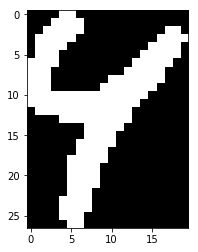

Label 0th image is: 6


In [5]:
i=0
image = X_train_orginal[i]
label = y_train[i]
plt.imshow(image, cmap='gray')
plt.show()
print("Label {}th image is: {}".format(i, label))

<div style="direction:rtl;text-align:right;font-family:Tahoma">
در کد بالا مقدار i را تغییر دهید و تصاویر را ببینید</div>

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تغییر اندازه تصاویر مجموعه داده</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
اندازه تصاویر مجموعه داده متفاوت است. <br>
تمام تصاویر را به یک اندازه مشخص (5*5) تغییر اندازه می‌دهیم.
</div>

In [6]:
#resize
X_train_5by5 = [cv2.resize(img, dsize=(5, 5)) for img in X_train_orginal]
X_test_5by_5 = [cv2.resize(img, dsize=(5, 5)) for img in X_test_original]

## <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تغییر شکل مجموعه داده</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
حالا داده های تصویری در مقیاس 5x5 است. برای استفاده در الگوریتم‌های خود آن ها را به یک بردار 25 تایی تغییر شکل میدهیم.
</div>


In [7]:
#reshape
X_train = [x.reshape(25) for x in X_train_5by5]
X_test = [x.reshape(25) for x in X_test_5by_5]

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma"> دانشگاه تربیت دبیر شهید رجایی<br>مباحث ویژه - آشنایی با بینایی کامپیوتر<br>علیرضا اخوان پور<br>96-97<br>
</div>
<a href="https://www.srttu.edu/">SRTTU.edu</a> - <a href="http://class.vision">Class.Vision</a> - <a href="http://AkhavanPour.ir">AkhavanPour.ir</a>
</div>